# Assignment 15 Solution

**1. Deep Learning.**

**a. Build a DNN with five hidden layers of 100 neurons each, He initialization, and the ELU activation function.**

**b. Using Adam optimization and early stopping, try training it on MNIST but only on digits 0 to 4, as we will use transfer learning for digits 5 to 9 in the next exercise. You will need a softmax output layer with five neurons, and as always make sure to save checkpoints at regular intervals and save the final model so you can reuse it later.**

**c. Tune the hyperparameters using cross-validation and see what precision you can achieve.**

**d. Now try adding Batch Normalization and compare the learning curves: is it converging faster than before? Does it produce a better model?**

**e. Is the model overfitting the training set? Try adding dropout to every layer and try
again. Does it help?**

**Ans:** **a. Build a DNN with five hidden layers of 100 neurons each, He initialization, and the ELU activation function.**

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeNormal

# Define the model
model = Sequential()

# Add the first hidden layer with He initialization and ELU activation
model.add(Dense(100, activation='elu', kernel_initializer=HeNormal(), input_shape=(784,)))

# Add four more hidden layers with He initialization and ELU activation
for _ in range(4):
    model.add(Dense(100, activation='elu', kernel_initializer=HeNormal()))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


E:\anacondaInstalledHere\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,910 (468.40 KB)

 Trainable params: 119,910 (468.40 KB)

 Non-trainable params: 0 (0.00 B)

**b. Using Adam optimization and early stopping, try training it on MNIST but only on digits 0 to 4, as we will use transfer learning for digits 5 to 9 in the next exercise. You will need a softmax output layer with five neurons, and as always make sure to save checkpoints at regular intervals and save the final model so you can reuse it later.**

**Ans:**

In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# Load the MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Filter digits 0 to 4
train_mask = (y_train_full < 5)
test_mask = (y_test < 5)
x_train = x_train_full[train_mask]
y_train = y_train_full[train_mask]
x_test = x_test[test_mask]
y_test = y_test[test_mask]

# Preprocess the data
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Define the model
model = Sequential([
    Dense(100, activation='elu', kernel_initializer='he_normal', input_shape=(784,)),
    Dense(100, activation='elu', kernel_initializer='he_normal'),
    Dense(100, activation='elu', kernel_initializer='he_normal'),
    Dense(100, activation='elu', kernel_initializer='he_normal'),
    Dense(100, activation='elu', kernel_initializer='he_normal'),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
checkpoint_path = "training_checkpoints/cp-{epoch:04d}.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              save_best_only=True,
                              verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    callbacks=[cp_callback, early_stopping_callback])

# Save the final model
model.save("mnist_model_0_to_4.h5")


Epoch 1/10
954/957 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9437 - loss: 0.1759
Epoch 1: val_loss improved from inf to 0.04262, saving model to training_checkpoints/cp-0001.weights.h5
957/957 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9438 - loss: 0.1756 - val_accuracy: 0.9866 - val_loss: 0.0426
Epoch 2/10
944/957 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9839 - loss: 0.0531
Epoch 2: val_loss improved from 0.04262 to 0.02968, saving model to training_checkpoints/cp-0002.weights.h5
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9838 - loss: 0.0531 - val_accuracy: 0.9901 - val_loss: 0.0297
Epoch 3/10
942/957 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.0327
Epoch 3: val_loss did not improve from 0.02968
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9895 - loss: 0.0327 - val_accuracy: 0.9891 - val_loss: 0.0346
Epoch 4/10
952/957 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9892 - loss: 0.0307
Epoch 4: val_loss did not improve from 0.02968

**c. Tune the hyperparameters using cross-validation and see what precision you can achieve.**

**Ans:** 

In [54]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold, ParameterGrid
import numpy as np

# Load the MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Filter digits 0 to 4
train_mask = (y_train_full < 5)
test_mask = (y_test < 5)
x_train = x_train_full[train_mask]
y_train = y_train_full[train_mask]
x_test = x_test[test_mask]
y_test = y_test[test_mask]

# Preprocess the data
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Define a function to create the model
def create_model(hidden_layers=5, units=100, activation='elu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_shape=(784,), kernel_initializer='he_normal'))
    for _ in range(hidden_layers - 1):
        model.add(Dense(units, activation=activation, kernel_initializer='he_normal'))
    model.add(Dense(5, activation='softmax'))  # 5 output classes
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define hyperparameters and their possible values
param_grid = {
    'hidden_layers': [3, 4, 5],
    'units': [50, 100, 200],
    'activation': ['relu', 'elu'],
    'optimizer': ['adam', 'rmsprop']
}

# Perform cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
best_score = 0
best_params = {}

for params in ParameterGrid(param_grid):
    print("Training with params:", params)
    scores = []
    for train_index, val_index in kf.split(x_train):
        X_train_cv, X_val = x_train[train_index], x_train[val_index]
        y_train_cv, y_val = y_train[train_index], y_train[val_index]
        
        model = create_model(**params)
        history = model.fit(X_train_cv, y_train_cv,
                            epochs=5,
                            batch_size=32,
                            validation_data=(X_val, y_val),
                            verbose=0)
        
        _, accuracy = model.evaluate(X_val, y_val, verbose=0)
        scores.append(accuracy)
        
    mean_score = np.mean(scores)
    print("Validation accuracy:", mean_score)
    
    if mean_score > best_score:
        best_score = mean_score
        best_params = params

print("Best validation accuracy:", best_score)
print("Best parameters:", best_params)

# Train the best model on the full training set
final_model = create_model(**best_params)
final_model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# Evaluate the final model on the test set
test_loss, test_accuracy = final_model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_accuracy)


Training with params: {'activation': 'relu', 'hidden_layers': 3, 'optimizer': 'adam', 'units': 50}
Validation accuracy: 0.9796052972475687
Training with params: {'activation': 'relu', 'hidden_layers': 3, 'optimizer': 'adam', 'units': 100}
Validation accuracy: 0.9870245456695557
Training with params: {'activation': 'relu', 'hidden_layers': 3, 'optimizer': 'adam', 'units': 200}
Validation accuracy: 0.9868283271789551
Training with params: {'activation': 'relu', 'hidden_layers': 3, 'optimizer': 'rmsprop', 'units': 50}
Validation accuracy: 0.9864361683527628
Training with params: {'activation': 'relu', 'hidden_layers': 3, 'optimizer': 'rmsprop', 'units': 100}
Validation accuracy: 0.9854884147644043
Training with params: {'activation': 'relu', 'hidden_layers': 3, 'optimizer': 'rmsprop', 'units': 200}
Validation accuracy: 0.9860438307126363
Training with params: {'activation': 'relu', 'hidden_layers': 4, 'optimizer': 'adam', 'units': 50}
Validation accuracy: 0.9843444426854452
Training with 

**d. Now try adding Batch Normalization and compare the learning curves: is it
converging faster than before? Does it produce a better model?**

**Ans:**

Training with params: {'activation': 'relu', 'hidden_layers': 3, 'optimizer': 'adam', 'units': 50, 'use_batch_norm': True}


E:\anacondaInstalledHere\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation accuracy: 0.9867630203564962
Training with params: {'activation': 'relu', 'hidden_layers': 3, 'optimizer': 'adam', 'units': 50, 'use_batch_norm': False}
Validation accuracy: 0.9848020871480306
Training with params: {'activation': 'relu', 'hidden_layers': 3, 'optimizer': 'adam', 'units': 100, 'use_batch_norm': True}
Validation accuracy: 0.9873512983322144
Training with params: {'activation': 'relu', 'hidden_layers': 3, 'optimizer': 'adam', 'units': 100, 'use_batch_norm': False}
Validation accuracy: 0.9869264562924703
Training with params: {'activation': 'relu', 'hidden_layers': 3, 'optimizer': 'adam', 'units': 200, 'use_batch_norm': True}
Validation accuracy: 0.9857497215270996
Training with params: {'activation': 'relu', 'hidden_layers': 3, 'optimizer': 'adam', 'units': 200, 'use_batch_norm': False}
Validation accuracy: 0.9847364028294882
Training with params: {'activation': 'relu', 'hidden_layers': 3, 'optimizer': 'rmsprop', 'units': 50, 'use_batch_norm': True}
Validation a

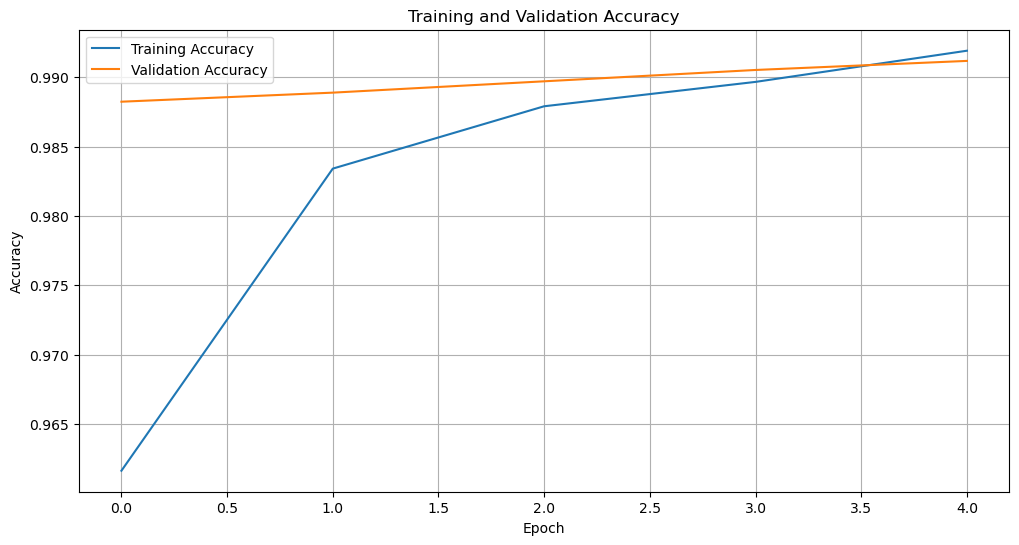

In [55]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.model_selection import KFold, ParameterGrid
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Filter digits 0 to 4
train_mask = (y_train_full < 5)
test_mask = (y_test < 5)
x_train = x_train_full[train_mask]
y_train = y_train_full[train_mask]
x_test = x_test[test_mask]
y_test = y_test[test_mask]

# Preprocess the data
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Define a function to create the model
def create_model(hidden_layers=5, units=100, activation='elu', optimizer='adam', use_batch_norm=True):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_shape=(784,), kernel_initializer='he_normal'))
    if use_batch_norm:
        model.add(BatchNormalization())
    for _ in range(hidden_layers - 1):
        model.add(Dense(units, activation=activation, kernel_initializer='he_normal'))
        if use_batch_norm:
            model.add(BatchNormalization())
    model.add(Dense(5, activation='softmax'))  # 5 output classes
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define hyperparameters and their possible values
param_grid = {
    'hidden_layers': [3, 4, 5],
    'units': [50, 100, 200],
    'activation': ['relu', 'elu'],
    'optimizer': ['adam', 'rmsprop'],
    'use_batch_norm': [True, False]
}

# Perform cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
best_score = 0
best_params = {}

for params in ParameterGrid(param_grid):
    print("Training with params:", params)
    scores = []
    for train_index, val_index in kf.split(x_train):
        X_train_cv, X_val = x_train[train_index], x_train[val_index]
        y_train_cv, y_val = y_train[train_index], y_train[val_index]
        
        model = create_model(**params)
        history = model.fit(X_train_cv, y_train_cv,
                            epochs=5,
                            batch_size=32,
                            validation_data=(X_val, y_val),
                            verbose=0)
        
        _, accuracy = model.evaluate(X_val, y_val, verbose=0)
        scores.append(accuracy)
        
    mean_score = np.mean(scores)
    print("Validation accuracy:", mean_score)
    
    if mean_score > best_score:
        best_score = mean_score
        best_params = params

print("Best validation accuracy:", best_score)
print("Best parameters:", best_params)

# Train the best model on the full training set
final_model = create_model(**best_params)
history = final_model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the final model on the test set
test_loss, test_accuracy = final_model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_accuracy)

# Plot the learning curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**e. Is the model overfitting the training set? Try adding dropout to every layer and try again. Does it help?**

**Ans:** 

In [72]:
# Load the MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Filter digits 0 to 4
train_mask = (y_train_full < 5)
test_mask = (y_test < 5)
x_train = x_train_full[train_mask]
y_train = y_train_full[train_mask]
x_test = x_test[test_mask]
y_test = y_test[test_mask]

In [73]:
# Build DNN with Dropout
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(5, activation="softmax")
])

In [74]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [76]:
# Train model
history_dropout = model.fit(x_train, y_train, epochs=10, batch_size=32,
                            callbacks=[early_stopping_cb])


Epoch 1/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8423 - loss: 0.9594
Epoch 2/10
 22/957 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8789 - loss: 0.4172

E:\anacondaInstalledHere\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


957/957 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8822 - loss: 0.4592
Epoch 3/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9169 - loss: 0.3173
Epoch 4/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9306 - loss: 0.2538
Epoch 5/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9481 - loss: 0.1942
Epoch 6/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9540 - loss: 0.1683
Epoch 7/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9572 - loss: 0.1621
Epoch 8/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9619 - loss: 0.1370
Epoch 9/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9657 - loss: 0.1366
Epoch 10/10
957/957 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9687 - loss: 0.1176


**2. Transfer learning.**

**a. Create a new DNN that reuses all the pretrained hidden layers of the previous model, freezes them, and replaces the softmax output layer with a new one.**

**b. Train this new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Despite this small number of examples, can you achieve high precision?**

**c. Try caching the frozen layers, and train the model again: how much faster is it now?**

**d. Try again reusing just four hidden layers instead of five. Can you achieve a higher precision?**

**e. Now unfreeze the top two hidden layers and continue training: can you get the model to perform even better?**

**Ans:**

In [1]:
import tensorflow as tf
from tensorflow import keras

In [26]:
# Load the pretrained model
pretrained_model = keras.models.load_model("mnist_model_0_to_4.h5")
pretrained_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,407 (466.44 KB)

 Trainable params: 119,405 (466.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [27]:
# Create a new DNN that reuses all the pretrained hidden layers of the previous model
new_model = keras.models.Sequential(pretrained_model.layers[:-1])

In [28]:
# Freeze the reused layers
for layer in new_model.layers:
    layer.trainable = False

In [29]:
# Add a new softmax output layer with the desired number of units
new_model.add(keras.layers.Dense(5, activation="softmax"))

In [30]:
# Compile the new model
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [32]:
# Load the training data for digits 5 to 9
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train[y_train >= 5]
y_train = y_train[y_train >= 5] - 5
X_test = X_test[y_test >= 5]
y_test = y_test[y_test >= 5] - 5

In [33]:
# Preprocess the data
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

In [36]:
# Train the new model on digits 5 to 9 using only 100 images per digit
history = new_model.fit(X_train[:500], y_train[:500], epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.3235 - loss: 2.5496 - val_accuracy: 0.5616 - val_loss: 1.3963
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6361 - loss: 1.1244 - val_accuracy: 0.6100 - val_loss: 1.1161
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7065 - loss: 0.8864 - val_accuracy: 0.6515 - val_loss: 0.9743
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7021 - loss: 0.8081 - val_accuracy: 0.6739 - val_loss: 0.9197
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7539 - loss: 0.6878 - val_accuracy: 0.6776 - val_loss: 0.8947
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7522 - loss: 0.6948 - val_accuracy: 0.6896 - val_loss: 0.8618
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7707 - loss: 0.6596 - val_accuracy: 0.7073 - val_loss: 0.8238
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7820 - loss: 0.6451 - val_accuracy: 0.7054 - v

In [37]:
# Evaluate the trained model
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6996 - loss: 0.8503
Test accuracy: 0.725365161895752


In [38]:
# Try caching the frozen layers and train the model again
new_model.layers[0].trainable = True
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = new_model.fit(X_train[:500], y_train[:500], epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.7979 - loss: 0.5965 - val_accuracy: 0.7461 - val_loss: 0.7336
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8617 - loss: 0.4614 - val_accuracy: 0.7521 - val_loss: 0.7091
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8489 - loss: 0.4907 - val_accuracy: 0.7638 - val_loss: 0.6945
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8509 - loss: 0.4207 - val_accuracy: 0.7801 - val_loss: 0.6619
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8480 - loss: 0.4302 - val_accuracy: 0.7842 - val_loss: 0.6506
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8522 - loss: 0.4366 - val_accuracy: 0.7922 - val_loss: 0.6301
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8438 - loss: 0.4336 - val_accuracy: 0.7963 - val_loss: 0.6149
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9057 - loss: 0.3060 - val_accuracy: 0.8033 - v

In [39]:
# Evaluate the trained model again
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7915 - loss: 0.6378
Test accuracy: 0.8125900030136108


In [40]:
# Try again reusing just four hidden layers instead of five
new_model2 = keras.models.Sequential(pretrained_model.layers[:-2])
for layer in new_model2.layers:
    layer.trainable = False
new_model2.add(keras.layers.Dense(5, activation="softmax"))
new_model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = new_model2.fit(X_train[:500], y_train[:500], epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.2836 - loss: 2.9407 - val_accuracy: 0.4915 - val_loss: 1.8192
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6126 - loss: 1.2647 - val_accuracy: 0.6015 - val_loss: 1.3881
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7517 - loss: 0.8705 - val_accuracy: 0.6478 - val_loss: 1.1668
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7616 - loss: 0.8124 - val_accuracy: 0.6752 - val_loss: 1.0540
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7712 - loss: 0.7716 - val_accuracy: 0.7029 - val_loss: 0.9562
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7758 - loss: 0.6934 - val_accuracy: 0.7167 - val_loss: 0.8979
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7966 - loss: 0.5815 - val_accuracy: 0.7336 - val_loss: 0.8335
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7791 - loss: 0.6371 - val_accuracy: 0.7426 - v

In [42]:
new_model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,307 (426.98 KB)

 Trainable params: 505 (1.97 KB)

 Non-trainable params: 108,800 (425.00 KB)

 Optimizer params: 2 (12.00 B)

In [41]:
# Evaluate the trained model again
test_loss, test_acc = new_model2.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7421 - loss: 0.8107
Test accuracy: 0.7693890333175659


In [43]:
# Now unfreeze the top two hidden layers and continue training
for layer in new_model2.layers[-3:]:
    layer.trainable = True
new_model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = new_model2.fit(X_train[:500], y_train[:500], epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8594 - loss: 0.4143 - val_accuracy: 0.7895 - val_loss: 0.6618
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8615 - loss: 0.4233 - val_accuracy: 0.7967 - val_loss: 0.6367
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8643 - loss: 0.4111 - val_accuracy: 0.8035 - val_loss: 0.6028
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8641 - loss: 0.3792 - val_accuracy: 0.8083 - val_loss: 0.5868
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9082 - loss: 0.3141 - val_accuracy: 0.8190 - val_loss: 0.5487
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9079 - loss: 0.2732 - val_accuracy: 0.8231 - val_loss: 0.5391
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8917 - loss: 0.3030 - val_accuracy: 0.8356 - val_loss: 0.5103
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9353 - loss: 0.2132 - val_accuracy: 0.8400 - v

In [44]:
# Evaluate the trained model again
test_loss, test_acc = new_model2.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8238 - loss: 0.5443
Test accuracy: 0.8440650105476379


**3. Pretraining on an auxiliary task.**

**a. In this exercise you will build a DNN that compares two MNIST digit images and predicts whether they represent the same digit or not. Then you will reuse the lower layers of this network to train an MNIST classifier using very little training data. Start by building two DNNs (let’s call them DNN A and B), both similar to the one you built earlier but without the output layer: each DNN should have five hidden layers of 100 neurons each, He initialization, and ELU activation. Next, add one more hidden layer with 10 units on top of both DNNs. To do this, you should use TensorFlow’s concat() function with axis=1 to concatenate the outputs of both DNNs for each instance, then feed the result to the hidden layer. Finally, add an output layer with a single neuron using the logistic activation function.**

**b. Split the MNIST training set in two sets: split #1 should containing 55,000 images, and split #2 should contain contain 5,000 images. Create a function that generates a training batch where each instance is a pair of MNIST images picked from split #1. Half of the training instances should be pairs of images that belong to the same class, while the other half should be images from different classes. For each pair, the training label should be 0 if the images are from the same class, or 1 if they are from different classes.**

**c. Train the DNN on this training set. For each image pair, you can simultaneously feed the first image to DNN A and the second image to DNN B. The whole network will gradually learn to tell whether two images belong to the same class or not.**

**d. Now create a new DNN by reusing and freezing the hidden layers of DNN A and adding a softmax output layer on top with 10 neurons. Train this network on split #2 and see if you can achieve high performance despite having only 500 images per class.**

In [99]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [100]:
# Load the MNIST dataset and split it into two sets
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train1 = X_train_full[:55000]
y_train1 = y_train_full[:55000]
X_train2 = X_train_full[55000:]
y_train2 = y_train_full[55000:]

In [101]:
# Define a function to generate a training batch where each instance is a pair of MNIST images
def generate_batch(batch_size):
    X_batch1 = np.empty((batch_size, 28, 28), dtype=np.float32)
    X_batch2 = np.empty((batch_size, 28, 28), dtype=np.float32)
    y_batch = np.empty((batch_size, 1), dtype=np.int32)
    for i in range(batch_size):
        index1 = np.random.randint(len(X_train1))
        X_batch1[i] = X_train1[index1]
        if i % 2 == 0:
            # Images from the same class
            index2 = index1
            while index2 == index1:
                index2 = np.random.randint(len(X_train1))
                if y_train1[index2] == y_train1[index1]:
                    break
            y_batch[i] = 0
        else:
            # Images from different classes
            index2 = index1
            while index2 == index1 or y_train1[index2] == y_train1[index1]:
                index2 = np.random.randint(len(X_train1))
            y_batch[i] = 1
        X_batch2[i] = X_train1[index2]
    return [X_batch1, X_batch2], y_batch

In [102]:
# Build two DNNs (let’s call them DNN A and B), both similar to the one you built earlier but without the output layer
def build_dnn():
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    for _ in range(5):
        model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
    return model

dnn_a = build_dnn()
dnn_b = build_dnn()

In [104]:
# Use the Functional API to merge their outputs
input_a = Input(shape=(28, 28))
input_b = Input(shape=(28, 28))

# Call the Sequential models on the inputs
output_a = dnn_a(input_a)
output_b = dnn_b(input_b)

In [105]:
# Add one more hidden layer with 10 units on top of both DNNs
merged_output = keras.layers.concatenate([dnn_a.output, dnn_b.output])
hidden_layer = keras.layers.Dense(10, activation="elu", kernel_initializer="he_normal")(merged_output)

In [106]:
# Add an output layer with a single neuron using the logistic activation function
output_layer = keras.layers.Dense(1, activation="sigmoid")(hidden_layer)

In [107]:
# Create a new model that takes two MNIST images as inputs and outputs a single value representing whether the images belong to the same class or not
model = keras.models.Model(inputs=[dnn_a.input, dnn_b.input], outputs=[output_layer])

In [108]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
# Train the DNN on this training set
batch_size = 32
for epoch in range(10):
    for iteration in range(len(X_train1) // batch_size):
        X_batch, y_batch = generate_batch(batch_size)
        model.train_on_batch(X_batch, y_batch)

In [ ]:
# Create a new DNN by reusing and freezing the hidden layers of DNN A and adding a softmax output layer on top with 10 neurons
new_model = keras.models.Sequential(dnn_a.layers[:-1])
for layer in new_model.layers:
    layer.trainable = False

new_model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
# Compile the new model
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
# Train this network on split #2 and see if you can achieve high performance despite having only 500 images per class
history = new_model.fit(X_train2, y_train2, epochs=10)

In [ ]:
# Evaluate the trained model on the test set
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")